# Classification de l'ensemble de données CIFAR10

# Préparation des données


Cet ensemble de données, ou dataset, contient 60 000 images de 10 catégories

Les bibliothèques utilisées pour écrire le code

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

Charger les données que l'on va analyser

In [0]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = torchvision.datasets.CIFAR10('~/.pytorch/CIFAR10/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2,)

# Download and load the test data
testset = torchvision.datasets.CIFAR10('~/.pytorch/CIFAR10/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

Extracting /root/.pytorch/CIFAR10/cifar-10-python.tar.gz to /root/.pytorch/CIFAR10/
Files already downloaded and verified


In [0]:
classes = ('avion', 'voiture', 'oiseau', 'chat',
           'renne', 'chien', 'grenouille', 'cheval', 'bateau', 'camion')

Un example d'une image contenue dans le dataset

chien camion grenouille grenouille


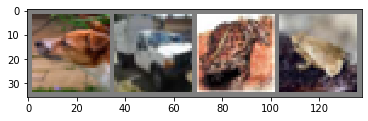

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


On définit la structure du réseau de neurones, et tous les paramètres de ses couches

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# Entraînement du réseau pour qu'il analyse les images et prédise la catégories auquelles elles appartiennent

On choisit les paramètres d'optimisation du modèle

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

On entraîne l'algorithme à identifier la classe des images

In [0]:
for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] perte: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Apprentissage terminé')

[1,  2000] perte: 2.207
[1,  4000] perte: 1.884
[1,  6000] perte: 1.695
[1,  8000] perte: 1.603
[1, 10000] perte: 1.583
[1, 12000] perte: 1.497
[2,  2000] perte: 1.417
[2,  4000] perte: 1.421
[2,  6000] perte: 1.366
[2,  8000] perte: 1.352
[2, 10000] perte: 1.336
[2, 12000] perte: 1.297
[3,  2000] perte: 1.233
[3,  4000] perte: 1.217
[3,  6000] perte: 1.219
[3,  8000] perte: 1.224
[3, 10000] perte: 1.195
[3, 12000] perte: 1.165
[4,  2000] perte: 1.093
[4,  4000] perte: 1.112
[4,  6000] perte: 1.112
[4,  8000] perte: 1.124
[4, 10000] perte: 1.100
[4, 12000] perte: 1.105
[5,  2000] perte: 1.008
[5,  4000] perte: 1.026
[5,  6000] perte: 1.039
[5,  8000] perte: 1.028
[5, 10000] perte: 1.043
[5, 12000] perte: 1.028
[6,  2000] perte: 0.946
[6,  4000] perte: 0.977
[6,  6000] perte: 0.946
[6,  8000] perte: 0.967
[6, 10000] perte: 0.975
[6, 12000] perte: 0.998
[7,  2000] perte: 0.882
[7,  4000] perte: 0.926
[7,  6000] perte: 0.914
[7,  8000] perte: 0.910
[7, 10000] perte: 0.926
[7, 12000] perte

A chaque "tour" d'apprentissage, on peut voir que la perte diminue, donc que notre modèle devient de plus en plus performant

On affiche quelques images et leur vraie catégorie en comparaison avec leur catégorie prédite


(note pour présentation : trouver une image bof facile à analyser pour une personne mais que l'algorithme a bien analysé et dire :"vous arriver à déterminer ce que c'est en 1,42s? Non? et bien cet algorithme l'a fait)

# Test du réseau sur des images inconnues et observation et du résultat

Catégories correctes :  renne voiture chien chien
Catégories prédites :  renne bateau chien chien


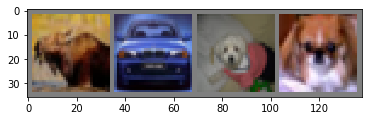

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('Catégories correctes : ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Catégories prédites : ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Et voici ce que l'algorithme a prédit

On regarde sur l'ensemble des prédictions à quelles point celles-ci sont correctes

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Précision du réseau sur les 10 000 images de test: %d %%' % (
    100 * correct / total))

Précision du réseau sur les 10 000 images de test: 62 %


Et on voit quelle catégorie est la mieux identifiée par l'algorithme, donc quelle catégorie a la meilleure précision

In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Précision de la classe : %5s => %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Précision de la classe : avion => 62 %
Précision de la classe : voiture => 72 %
Précision de la classe : oiseau => 49 %
Précision de la classe :  chat => 45 %
Précision de la classe : renne => 63 %
Précision de la classe : chien => 41 %
Précision de la classe : grenouille => 82 %
Précision de la classe : cheval => 60 %
Précision de la classe : bateau => 83 %
Précision de la classe : camion => 62 %


Avec un learning rate de 0.01 et SDG optimizer : 56% accuracy

avec SGD lr=0.001, momentum=0.8 : 41% accuracy

avec SGD lr=0.001, momentum=0.96 : 41% accuracy

avec SDG et lr=0.001, momentum=0.9 : 38% accuracy